In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow
import keras

# Анатомия нейронной сети

Обучение нейронных сетей сосредоточено на
следующих объектах:
- слоях, которые объединяются в сеть (или модель);
- исходных данных и соответствующих им целях;
- функции потерь, которая определяет сигнал обратной связи, используемый для
обучения;
- оптимизаторе, определяющем, как происходит обучение.

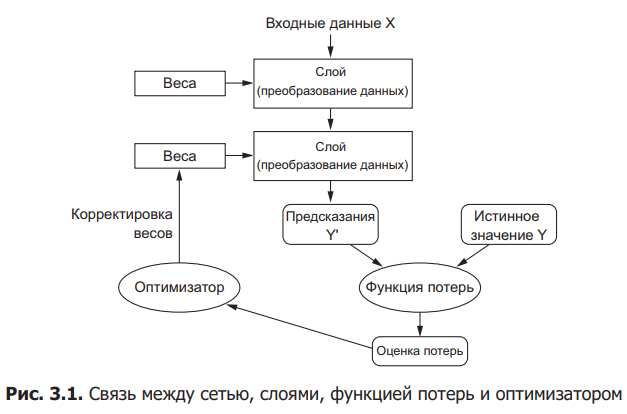

## Слои

Слой — это модуль обработки данных, принимающий
на входе и возвращающий на выходе один или несколько тензоров.

Разным слоям соответствуют тензоры разных форматов и разные виды обработки
данных. 
- Простые векторные данные, хранящиеся в двумерных тензорах
с формой (образцы, признаки), часто обрабатываются плотно связанными слоями,
которые также называют полносвязными, или плотными, слоями (класс Dense
в Keras). 
- Ряды данных хранятся в трехмерных тензорах с формой (образцы, метки_времени, признаки) и обычно обрабатываются рекуррентными слоями, такими
как LSTM. 
- Изображения хранятся в четырехмерных тензорах и обычно обрабатываются двумерными сверточными слоями (Conv2D)

Создание моделей глубокого обучения в Keras осуществляется путем объединения совместимых слоев в конвейеры
обработки данных. Понятие совместимости слоев в данном случае отражает лишь
тот факт, что каждый слой принимает и возвращает тензоры определенной формы.
Взгляните на следующий пример:

In [3]:
# from keras import layers
# 
# layer = layers.Dense(32, input_shape=(784,)) # Полносвязный слой с 32 выходными нейронами

Здесь создается слой, принимающий только двумерные тензоры, первое измерение которых равно 784 (ось 0 — измерение пакетов — не задана, поэтому
допустимо любое значение). Этот слой возвращает тензор, первое измерение
которого равно 32. Другими словами, этот слой можно связать со слоем ниже, только если тот принимает двумерные векторы. 

Фреймворк Keras избавляет от необходимости беспокоиться о совместимости, потому что слои, добавляемые в модели, автоматически
конструируются так, чтобы соответствовать форме входного слоя.

## Функции потерь и оптимизаторы

Нейронная сеть с несколькими выходами может иметь несколько функций потерь
(по одной на выход). Однако процесс градиентного спуска должен быть основан на
единственном скалярном значении потери, то есть для сетей с несколькими функциями потерь все потери объединяются (усреднением) в единственное скалярное
значение.

К счастью для общих проблем, таких как классификация, регрессия и предсказание
последовательностей, имеются простые рекомендации, которым можно следовать
при выборе функции потерь. 

- Для классификации в две категории можно
использовать функцию бинарной перекрестной энтропии
- Для классификации в несколько категорий — многозначной перекрестной энтропии
- Для задач регрессии —
среднеквадратичной ошибки
- Для обучения на последовательностях — ассоциативной временной классификации (Connectionist Temporal Classification, CTC)

Только сталкиваясь с действительно новыми исследовательскими задачами, вам
придется разрабатывать свои целевые функции. 

## Разработка с использованием Keras

Keras — это библиотека уровня модели, предоставляющая высокоуровневые
строительные блоки для конструирования моделей глубокого обучения. Она не
реализует низкоуровневые операции, такие как манипуляции с тензорами и дифференцирование, — для этого используется специализированная и оптимизированная библиотека поддержки тензоров. 

К фреймворку Keras можно подключить несколько разных низкоуровневых
библиотек. В настоящее время (2017) поддерживаются три такие библиотеки: TensorFlow,
Theano и Microsoft Cognitive Toolkit (CNTK).

Вот как выглядит типичный процесс использования Keras:
1. Определяются обучающие данные: входные и целевые тензоры.
2. Определяются слои сети (модель), отображающие входные данные в целевые.
3. Настраивается процесс обучения выбором функции потерь, оптимизатора и некоторых параметров для мониторинга.
4. Выполняются итерации по обучающим данным вызовом метода fit() модели.

Модель можно определить двумя способами: с использованием класса Sequential
(только для линейного стека слоев — наиболее популярная архитектура сетей в настоящее время) или функционального API (для ориентированного ациклического
графа слоев, позволяющего конструировать произвольные архитектуры).

In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

А вот та же модель, но сконструированная с применением функционального API:

In [5]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)# 

Функциональный API позволяет манипулировать данными в тензорах, которые
обрабатывает модель, и применять слои к этим тензорам, как если бы они были
функциями.

Пример
с единственной функцией потерь, которая используется чаще всего:

In [6]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

Процесс обучения:

In [7]:
# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

# Классификация отзывов к фильмам: пример бинарной классификации

In [80]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Аргумент num_words=10000 означает, что в обучающих данных будет сохранено
только 10 000 слов, наиболее часто встречающихся в обучающем наборе отзывов. Редкие слова будут отброшены. Это позволит вам работать с вектором управляемого размера.

Переменные train_data и test_data — это списки отзывов; каждый отзыв — это
список индексов слов (кодированное представление последовательности слов).
Переменные train_labels и test_labels — это списки нулей и единиц, где нули
соответствуют отрицательным отзывам, а единицы — положительным

In [81]:
train_data[5]

[1,
 778,
 128,
 74,
 12,
 630,
 163,
 15,
 4,
 1766,
 7982,
 1051,
 2,
 32,
 85,
 156,
 45,
 40,
 148,
 139,
 121,
 664,
 665,
 10,
 10,
 1361,
 173,
 4,
 749,
 2,
 16,
 3804,
 8,
 4,
 226,
 65,
 12,
 43,
 127,
 24,
 2,
 10,
 10]

In [82]:
train_labels[5]

0

In [83]:
max([max(sequence) for sequence in train_data])

9999

## Подготовка данных

Нельзя передать списки целых чисел непосредственно в нейронную сеть. Поэтому
мы должны преобразовать их в тензоры. Сделать это можно двумя способами:
- Привести все списки к одинаковой длине, преобразовать их в тензоры целых
чисел с формой (образцы, индексы_слов) и затем передать их в первый слой
сети, способный обрабатывать такие целочисленные тензоры (слой Embedding,
о котором подробнее мы поговорим далее в этой книге).
- Выполнить прямое кодирование списков в векторы нулей и единиц. Это может
означать, например, преобразование последовательности [3, 5] в 10 000-мерный
вектор, все элементы которого содержат нули, кроме элементов с индексами
3 и 5, которые содержат единицы. Затем их можно передать в первый слой сети типа Dense, способный обрабатывать векторизованные данные с вещественными
числами.

Мы пойдем по второму пути.

Как я понял, в данном решении мы не учитываем количество повторяющихся слов и их последовательность. Мы просто проверяем, есть ли такое слово в отзыве или нет.

In [12]:
# Кодирование последовательностей целых чисел в бинарную матрицу

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Создание матрицы с формой (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Запись единицы в элемент с данным индексом
    return results

# i - номер отзыва, всего 25000
# sequence - номер слова из топ 10000 слов. 
# Например, [3, 5] закодируются в [0, 0, 0, 1, 0, 5, 0, ... 0]
# results[номер отзыва, номер слова]
# по итогу получаем матрицу размером 25000 X 10000

x_train = vectorize_sequences(train_data) # Векторизованные обучающие данные
x_test = vectorize_sequences(test_data) # Векторизованные контрольные данные

После кодирования нам также нужно векторизовать метки:

In [85]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Теперь данные готовы к передаче в нейронную сеть.

## Конструирование сети

Входные данные представлены векторами, а метки — скалярами (единицами и нулями): это самый простой набор данных, какой можно встретить. С задачами этого
вида прекрасно справляются сети, организованные как простой стек полносвязных
(Dense) слоев с операцией активации relu: Dense(16, activation='relu'). Аргумент (16), передаваемый каждому слою Dense, — это число скрытых нейронов
слоя. 

- Скрытый нейрон (hidden unit) — это измерение в пространстве представлений
слоя. 

Наличие 16 скрытых нейронов означает, что весовая матрица W будет иметь форму
(input_dimension, 16): скалярное произведение на W спроецирует входные данные
в 16-мерное пространство представлений (затем будет произведено сложение
с вектором смещений b и выполнена операция relu). Размерность пространства
представлений можно интерпретировать как «степень свободы нейронной сети
при изучении внутренних представлений». 

Большее количество скрытых нейронов (большая размерность пространства представлений) позволяет сети обучаться
на более сложных представлениях, но при этом увеличивается вычислительная
стоимость сети, что может привести к выявлению нежелательных шаблонов (шаблонов, которые могут повысить качество классификации обучающих данных, но
не контрольных).

В отношении такого стека слоев Dense требуется принять два важных архитектурных решения:
- сколько слоев использовать;
- сколько скрытых нейронов выбрать для каждого слоя.

В данном случае подойдет такая структура (подробнее в 4 гл.):
- два промежуточных слоя с 16 скрытыми нейронами в каждом;
- третий слой будет выводить скалярное значение — оценку направленности
текущего отзыва.

Промежуточные слои будут использовать операцию relu в качестве функции
активации, а последний слой будет использовать сигмоидную функцию активации и выводить вероятность (оценку вероятности, между 0 и 1 того, что образец
относится к классу «1», то есть насколько он близок к положительному отзыву).
- Функция relu (rectified linear unit — блок линейной ректификации) используется для преобразования отрицательных значений в ноль
- сигмоидная
функция рассредоточивает произвольные значения по интервалу [0, 1],
возвращая значения, которые можно интерпретировать как вероятность.

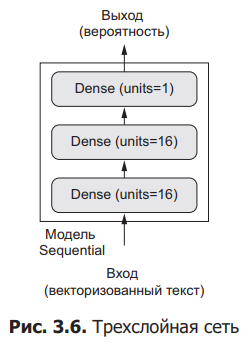

In [14]:
# Определение модели
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Нужно выбрать функцию потерь и оптимизатор:

- Так как перед нами стоит
задача бинарной классификации и результатом работы сети является вероятность
(наша сеть заканчивается одномодульным слоем с сигмоидной функцией активации), предпочтительнее использовать функцию потерь binary_crossentropy. Можно также задействовать, например,
mean_squared_error, однако перекрестная энтропия обычно дает более качественные результаты, когда результатами работы моделей являются вероятности. Перекрестная энтропия (crossentropy) — это термин из области теории информации,
обозначающий меру расстояния между распределениями вероятностей, или в данном случае — между фактическими данными и предсказаниями.
- Оптимизатором выберем rmsprop

In [15]:
# Компиляция модели
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Иногда бывает желательно настроить параметры оптимизатора или передать свою функцию потерь или метрик:

- Настроить параметры оптимизатора можно путем передачи в аргументе optimizer экземпляра класса оптимизатора:

In [16]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

D:\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


- Передать свою функцию потерь или метрик можно путем передачи в аргументе loss и (или)
metrics объекта функции:

In [17]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Функция активации

Без функции активации, такой как relu (также называемой фактором нелинейности),
слой Dense будет состоять из двух линейных операций — скалярного произведения
и сложения:

In [18]:
# output = dot(W, input) + b

Такой слой сможет обучаться только на линейных (аффинных) преобразованиях входных данных: пространство гипотез слоя было бы совокупностью всех возможных линейных преобразований входных данных в 16-мерное пространство Такое пространство гипотез слишком ограниченно, и наложение нескольких слоев представлений друг
на друга не приносило бы никакой выгоды, потому что глубокий стек линейных слоев
все равно реализует линейную операцию: добавление новых слоев не расширяет пространства гипотез

Чтобы получить доступ к более обширному пространству гипотез, дающему дополнительные выгоды от увеличения глубины представлений, необходимо применить нелинейную функцию, или функцию активации Функция активации relu — самая популярная в глубоком обучении, однако на выбор имеется еще несколько функций активации
с немного странными на первый взгляд именами: prelu, elu и т д.

## Проверка решения

In [19]:
# Создание проверочного набора
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Теперь проведем обучение модели в течение 20 эпох (выполнив 20 итераций по
всем образцам в тензорах x_train и y_train) пакетами по 512 образцов. В то же
время будем следить за потерями и точностью на 10 000 отложенных образцов.
Для этого достаточно передать проверочные данные в аргументе validation_data.

In [20]:
# Обучение модели
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 29ms/step - loss: 0.5330 - acc: 0.7943 - val_loss: 0.4216 - val_acc: 0.8445
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3323 - acc: 0.8983 - val_loss: 0.3193 - val_acc: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2447 - acc: 0.9193 - val_loss: 0.3158 - val_acc: 0.8705
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1928 - acc: 0.9381 - val_loss: 0.2725 - val_acc: 0.8927
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1566 - acc: 0.9493 - val_loss: 0.2759 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1325 - acc: 0.9581 - val_loss: 0.2841 - val_acc: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1079 - acc: 0.9677 - val_loss: 0.2957 - val_acc: 0.8852
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0898 - a

Вызов model.fit() возвращает объект History. Этот
объект имеет поле history — словарь с данными обо всем происходившем в процессе обучения. Заглянем в него:

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Словарь содержит четыре элемента — по одному на метрику, — за которыми
осуществлялся мониторинг в процессе обучения и проверки.

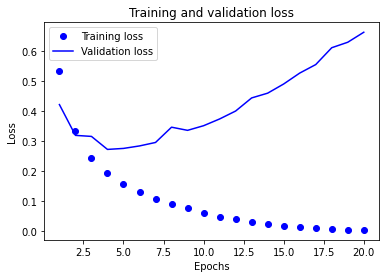

In [22]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

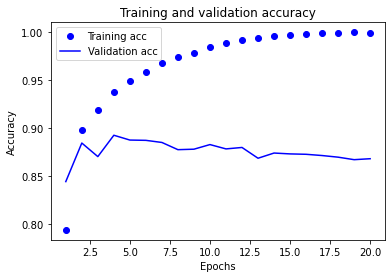

In [23]:
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Модель переобучилась. Потери и точности достигли пика в четвертую эпоху. 

Обучим новую сеть с нуля в течение четырех эпох и затем оценим получившийся результат на контрольных данных:

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4468 - accuracy: 0.8211
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2586 - accuracy: 0.9089
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1996 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2931 - accuracy: 0.8847


In [25]:
results

[0.29308637976646423, 0.8847200274467468]

## Использование обученной сети для предсказаний на новых данных

In [26]:
pred = model.predict(x_test)
pred

782/782 [==============================] - 1s 1ms/step


array([[0.23560962],
       [0.99971414],
       [0.9018482 ],
       ...,
       [0.12532163],
       [0.09503882],
       [0.565201  ]], dtype=float32)

Сеть уверена в одних образцах (0,99 или выше или 0,01 или ниже), но
не так уверена в других (0,6; 0,4).

## Итоги

- Стек слоев Dense с функцией активации relu способен решать широкий круг
задач (включая классификацию эмоциональной окраски), и вы, вероятно, чаще
всего будете использовать именно эту комбинацию
- В задаче бинарной классификации (с двумя выходными классами) в конце
вашей нейросети должен находиться слой Dense с одним нейроном и функцией
активации sigmoid: результатом работы сети должно быть скалярное значение
в диапазоне между 0 и 1, представляющее собой вероятность
- С таким скалярным результатом, получаемым с помощью сигмоидной функции,
в задачах бинарной классификации следует использовать функцию потерь
binary_crossentropy
- В общем случае оптимизатор rmsprop является наиболее подходящим выбором
для любого типа задач
- По мере улучшения на обучающих данных нейронные сети рано или поздно
начинают переобучаться, демонстрируя ухудшение результатов на данных, которые они прежде не видели. Поэтому всегда контролируйте качество работы
сети на данных не из обучающего набора

# Классификация новостных лент: пример классификации в несколько классов

In [113]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [114]:
len(train_data)

8982

In [115]:
len(test_data)

2246

In [116]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [117]:
# можно декодировать индексы в слова
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.
items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
# Обратите внимание, что индексы смещены на 3, потому что индексы
# 0, 1 и 2 зарезервированы для слов «padding» (отступ), «start of
# sequence» (начало последовательности) и «unknown» (неизвестно) 

## Подготовка данных

In [118]:
# Для векторизации данных можно повторно использовать код из предыдущего примера
# Здесь dimension - 10000 самых употребляемых слов
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # Векторизованные обучающие данные
x_test = vectorize_sequences(test_data)

In [119]:
len(x_train)

8982

In [120]:
len(x_train[0])

10000

Как упоминалось в 2.1  Подготовка данных, Векторизовать метки можно одним из двух способов: сохранить их в тензоре
целых чисел или использовать прямое кодирование.
- Прямое кодирование (onehot encoding) широко используется для форматирования категорий и также называется кодированием категорий (categorical encoding)

In [121]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [122]:
# этот способ уже реализован в Keras
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) # тренировочные y
one_hot_test_labels = to_categorical(test_labels) # тестовые y

In [123]:
len(one_hot_train_labels)

8982

In [124]:
len(one_hot_train_labels[0])

46

## Конструирование сети

Задача классификации по темам напоминает предыдущую задачу классификации
отзывов: в обоих случаях мы пытаемся классифицировать короткие фрагменты
текста. Но в данном случае количество выходных классов увеличилось с 2 до 46.
Размерность выходного пространства теперь намного больше.

В стеке слоев Dense каждый слой имеет доступ только
к информации, предоставленной предыдущим слоем. Если один слой отбросит
какую-то информацию, важную для решения задачи классификации, последующие слои не смогут восстановить ее: каждый слой может стать узким местом для
информации. В предыдущем примере мы использовали 16-мерные промежуточные
слои, но 16-мерное пространство может оказаться слишком ограниченным для
классификации на 46 разных классов: такие малоразмерные слои могут сыграть
роль «бутылочного горлышка» для информации, не пропуская важные данные.

По этой причине в данном примере мы будем использовать слои с большим количеством измерений. Давайте выберем 64 нейрона.

In [125]:
# Определение модели
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Отметим еще две особенности этой архитектуры:
- Сеть завершается слоем Dense с размером 46. Это означает, что для каждого
входного образца сеть будет выводить 46-мерный вектор. Каждый элемент этого
вектора (каждое измерение) представляет собой отдельный выходной класс.
- Последний слой использует функцию активации softmax. Мы уже видели этот
шаблон в примере MNIST. Он означает, что сеть будет выводить распределение
вероятностей по 46 разным классам — для каждого образца на входе сеть будет
возвращать 46-мерный вектор, где output[i] — вероятность принадлежности
образца классу i. Сумма 46 элементов всегда будет равна 1.

Лучшим вариантом в данном случае является использование функции потерь
categorical_crossentropy. Она определяет расстояние между распределениями
вероятностей: в данном случае между распределением вероятности на выходе
сети и истинным распределением меток. Минимизируя расстояние между этими
двумя распределениями, мы учим сеть выводить результат, максимально близкий
к истинным меткам.

In [126]:
# Компиляция модели
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Проверка решения

In [127]:
# Создание проверочного набора
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Теперь проведем обучение модели в течение 20 эпох.
- Мы берем большое число эпох, чтобы понять, когда наступает переобучение

In [128]:
# Обучение модели
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.7527 - accuracy: 0.4880 - val_loss: 1.8688 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.4785 - accuracy: 0.6957 - val_loss: 1.3500 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0571 - accuracy: 0.7823 - val_loss: 1.1469 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8166 - accuracy: 0.8322 - val_loss: 1.0373 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6477 - accuracy: 0.8629 - val_loss: 0.9713 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5137 - accuracy: 0.8943 - val_loss: 0.9374 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4097 - accuracy: 0.9143 - val_loss: 0.9086 - val_accuracy: 0.8290
Epoch 8/20
16

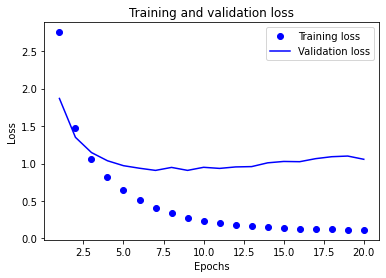

In [129]:
# Формирование графиков потерь на этапах обучения и проверки
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

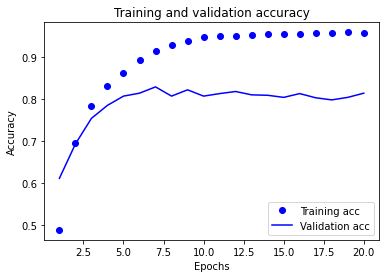

In [130]:
# Формирование графиков точности на этапах обучения и проверки
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Переобучение сети наступает в девятой эпохе. Давайте теперь обучим новую сеть
до девятой эпохи и затем оценим получившийся результат на контрольных данных.

In [131]:
# Обучение новой модели с нуля до 9 эпохи
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 2.6919 - accuracy: 0.5063 - val_loss: 1.7935 - val_accuracy: 0.6300
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.4790 - accuracy: 0.6922 - val_loss: 1.3317 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.0736 - accuracy: 0.7706 - val_loss: 1.1452 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.8278 - accuracy: 0.8269 - val_loss: 1.0267 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.6515 - accuracy: 0.8678 - val_loss: 0.9709 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.5185 - accuracy: 0.8960 - val_loss: 0.9202 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 0s 20ms/step - loss: 0.4104 - accuracy: 0.9168 - val_loss: 0.8884 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [132]:
results

[1.0006377696990967, 0.7876224517822266]

## Предсказания на новых данных

Теперь можно убедиться в том, что метод predict модели возвращает распределение вероятностей по всем 46 темам. Давайте сгенерируем предсказания для всех
контрольных данных.

In [133]:
# Получение предсказаний для новых данных
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [134]:
predictions[0]

array([3.6937057e-05, 5.4283859e-04, 2.9481539e-06, 9.5210111e-01,
       2.9998116e-02, 5.0577155e-06, 2.3698223e-05, 7.8530022e-05,
       2.9500609e-03, 4.7176803e-05, 1.0527225e-04, 1.1800890e-03,
       1.3593030e-04, 2.5555005e-04, 1.3350422e-04, 5.2117623e-05,
       6.2441295e-03, 4.9334325e-05, 9.5979543e-05, 1.4391311e-03,
       4.0563260e-04, 2.9513863e-04, 1.8674766e-05, 2.4703299e-04,
       1.3022523e-05, 2.4656649e-04, 1.5671636e-05, 3.1713629e-05,
       1.8911058e-04, 2.8030280e-04, 4.5350217e-04, 7.0525835e-05,
       6.0379596e-05, 2.6754728e-05, 4.6129462e-05, 1.8990262e-05,
       6.4516353e-04, 1.0746472e-04, 2.7779077e-05, 9.4291003e-04,
       6.2689054e-05, 2.2990680e-04, 2.2799901e-05, 6.1346495e-06,
       6.4510873e-06, 5.1910574e-05], dtype=float32)

In [135]:
np.argmax(predictions[0])

3

## Другой способ обработки меток и потерь

Выше упоминалось, что метки также можно было бы преобразовать в тензор целых
чисел, как показано ниже:

In [137]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Единственное, что изменилось в данном случае, — функция потерь. До этого 
использовалась функция потерь categorical_crossentropy, предполагающая, что
метки получены методом кодирования категорий. С целочисленными метками
следует использовать функцию sparse_categorical_crossentropy:

In [143]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

С математической точки зрения эта новая функция потерь равноценна функции
categorical_crossentropy; ее отличает только интерфейс.

## Важность использования достаточно больших промежуточных слоев

Выше уже говорилось, что не следует использовать слои, в которых значительно
меньше 46 скрытых нейронов, потому что результат является 46-мерным. Теперь
давайте посмотрим, что получится, если образуется узкое место для информации
из-за промежуточных слоев с размерностями намного меньше 46, например четырехмерных.

In [144]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 2.6867 - accuracy: 0.4718 - val_loss: 1.9696 - val_accuracy: 0.5550
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 1.7234 - accuracy: 0.5927 - val_loss: 1.5761 - val_accuracy: 0.6000
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 1.4082 - accuracy: 0.6391 - val_loss: 1.4453 - val_accuracy: 0.6330
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 1.2278 - accuracy: 0.6844 - val_loss: 1.3944 - val_accuracy: 0.6500
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 1.1033 - accuracy: 0.7033 - val_loss: 1.3643 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 1.0062 - accuracy: 0.7166 - val_loss: 1.3581 - val_accuracy: 0.6700
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 0.9202 - accuracy: 0.7513 - val_loss: 1.3217 - val_accuracy: 0.6840
Epoch 8/20
63

Теперь сеть показывает точность ~71 % — абсолютное падение составило 8 %. Это
падение в основном обусловлено попыткой сжать большой объем информации
(достаточной для восстановления гиперплоскостей, разделяющих 46 классов)
в промежуточное пространство со слишком малой размерностью. Сети удалось
вместить боольшую часть необходимой информации в эти четырехмерные представления, но не всю.

## Итоги

- Если вы пытаетесь классифицировать образцы данных по N классам, сеть должна завершаться слоем Dense размера N.
- В задаче однозначной многоклассовой классификации заключительный слой
сети должен иметь функцию активации softmax, чтобы он мог выводить распределение вероятностей между N классами.
- Для решения подобных задач почти всегда следует использовать функцию потерь categorical_crossentropy. Она минимизирует расстояние между распределениями вероятностей, выводимыми сетью, и истинными распределениями
целей.
- Метки в многоклассовой классификации можно обрабатывать двумя способами:
- - Кодировать метки с применением метода кодирования категорий (также известного как прямое кодирование) и использовать функцию потерь
categorical_crossentropy.
- - Кодировать метки как целые числа и использовать функцию потерь sparse_
categorical_crossentropy.
- Когда требуется классифицировать данные относительно большого количества
категорий, следует предотвращать появление в сети узких мест для информации
из-за слоев с недостаточно большим количеством измерений.

# Предсказание цен на дома: пример регрессии

## Набор данных с ценами на жилье в Бостоне

Мы попытаемся предсказать медианную цену на дома в пригороде Бостона

In [145]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [147]:
train_data.shape

(404, 13)

In [148]:
test_data.shape

(102, 13)

## Подготовка данных

Было бы проблематично передать в нейронную сеть значения, имеющие самые
разные диапазоны. Сеть, конечно, сможет автоматически адаптироваться к таким
разнородным данным, однако это усложнит обучение. 
- На практике к таким данным принято применять нормализацию: для каждого признака во входных данных
(столбца в матрице входных данных) из каждого значения вычитается среднее по
этому признаку, и разность делится на стандартное отклонение, в результате признак центрируется по нулевому значению и имеет стандартное отклонение, равное
единице.

In [149]:
# Нормализация данных

mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

- Обратите внимание на то, что величины, используемые для нормализации контрольных данных, вычисляются с использованием обучающих данных. 
- Никогда не
следует использовать в работе какие-либо значения, вычисленные по контрольным
данным, даже для таких простых шагов, как нормализация данных.

## Конструирование сети

Из-за небольшого количества образцов мы будем использовать очень маленькую
сеть с двумя четырехмерными промежуточными слоями:
- Чем
меньше обучающих данных, тем скорее наступит переобучение, а использование
маленькой сети — один из способов борьбы с ним.

In [150]:
# Определение модели
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

Сеть заканчивается одномерным слоем, не имеющим функции активации (это
линейный слой). Это типичная конфигурация для скалярной регрессии (целью которой является предсказание одного значения на непрерывной числовой прямой).

Сеть компилируется с функцией потерь mse — mean
squared error (среднеквадратичная ошибка), вычисляющей квадрат разности между
предсказанными и целевыми значениями. Эта функция широко используется
в задачах регрессии.

Мы также включили новый параметр в мониторинг на этапе обучения: mae — mean
absolute error (средняя абсолютная ошибка). Это абсолютное значение разности
между предсказанными и целевыми значениями. Например, значение MAE, равное 0,5, в этой задаче означает, что в среднем прогнозы отклоняются на 500 долларов США.

## Оценка решения методом перекрестной проверки по K блокам

Т.к. набор данных маленький, лучшей практикой в таких ситуациях является применение перекрестной проверки по K блокам (K-fold cross-validation)

In [152]:
# Перекрестная проверка по K блокам
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1)
                                * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [153]:
all_scores

[2.1926045417785645, 2.6424267292022705, 2.681061029434204, 2.5521674156188965]

In [154]:
np.mean(all_scores)

2.517064929008484

В данном случае
средняя ошибка составила 2500 долларов, что довольно много, если вспомнить,
что цены колеблются в диапазоне от 10 000 до 50 000 долларов.

Попробуем увеличить время обучения сети до 500 эпох. Чтобы получить информацию о качестве обучения модели в каждую эпоху, изменим цикл обучения и добавим сохранение оценки проверки перед началом эпохи:

In [156]:
# Сохранение оценки проверки перед каждым прогоном
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:
                                (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Теперь можно вычислить средние значения метрики mae для всех прогонов.

In [157]:
# Создание истории последовательных средних оценок проверки по K блокам
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

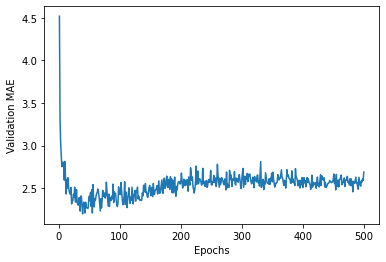

In [158]:
# Формирование графика с оценками проверок
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Из-за проблем с масштабированием, а также ввиду относительно высокой дисперсии может быть немного затруднительно увидеть общую тенденцию. Давайте
сделаем следующее:
- опустим первые 10 замеров, которые имеют другой масштаб, отличный от масштаба остальной кривой;
- заменим каждую оценку экспоненциальным скользящим средним по предыдущим оценкам, чтобы получить более гладкую кривую.

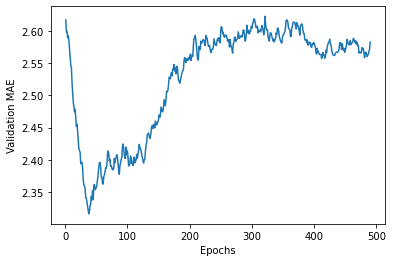

In [159]:
# Формирование графика с оценками проверок за исключением первых 10 замеров
def smooth_curve(points, factor=0.9):


smoothed_points = []
for point in points:
if smoothed_points:
previous = smoothed_points[-1]
smoothed_points.append(previous * factor + point * (1 - factor))
else:
smoothed_points.append(point)
return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Согласно этому графику, наилучшая оценка MAE достигается после 80 эпох. После
этого момента начинается переобучение.

По окончании настройки других параметров модели (кроме количества эпох можно
также скорректировать количество промежуточных слоев) можно обучить окончательную версию модели на всех обучающих данных, а затем оценить ее качество
на контрольных данных.

In [160]:
# Обучение окончательной версии модели
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 18.0385 - mae: 2.6382


In [161]:
# Вот окончательный результат:
test_mae_score

2.6382391452789307

## Итоги

Вот какие выводы вы должны сделать из этого примера:
- Регрессия выполняется с применением иных функций потерь, нежели классификация. Для регрессии часто используется функция потерь, вычисляющая
среднеквадратичную ошибку (Mean Squared Error, MSE).
- Аналогично, для регрессии используются иные метрики оценки, нежели при
классификации; понятие точности неприменимо для регрессии, поэтому для
оценки качества часто применяется средняя абсолютная ошибка (Mean Absolute
Error, MAE).
- Когда признаки образцов на входе имеют значения из разных диапазонов, их
необходимо предварительно масштабировать.
- При небольшом объеме входных данных надежно оценить качество модели поможет метод перекрестной проверки по K блокам.
- При небольшом объеме обучающих данных предпочтительнее использовать маленькие сети с небольшим количеством промежуточных слоев (обычно с одним
или двумя), чтобы избежать серьезного переобучения.

# Итоги

- Теперь вы умеете решать наиболее распространенные задачи машинного обучения на векторных данных: бинарную классификацию, многоклассовую классификацию и скалярную регрессию. В разделах «Подведение итогов» выше в этой
главе перечисляются наиболее важные выводы, которые вы должны извлечь из
примеров решения этих задач.
- Исходные данные обычно приходится подвергать предварительной обработке
перед передачей в нейронную сеть.
- Когда данные включают в себя признаки со значениями из разных диапазонов,
их необходимо предварительно масштабировать.
- В процессе обучения нейронных сетей в некоторый момент наступает эффект
переобучения, из-за чего падает качество результатов оценки сети на данных,
которые она прежде не видела.
- При небольшом объеме входных данных используйте небольшие сети с одним
или двумя промежуточными слоями, чтобы избежать серьезного переобучения.
- В том случае, когда данные делятся на большое число категорий, у вас может
возникнуть узкое место для информации, если вы слишком сильно ограничите
размерность промежуточных слоев.
- При регрессии применяются иные функции потерь и метрики, нежели при
классификации.
- При небольшом объеме входных данных надежно оценить качество модели поможет метод перекрестной проверки по K блокам.